In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

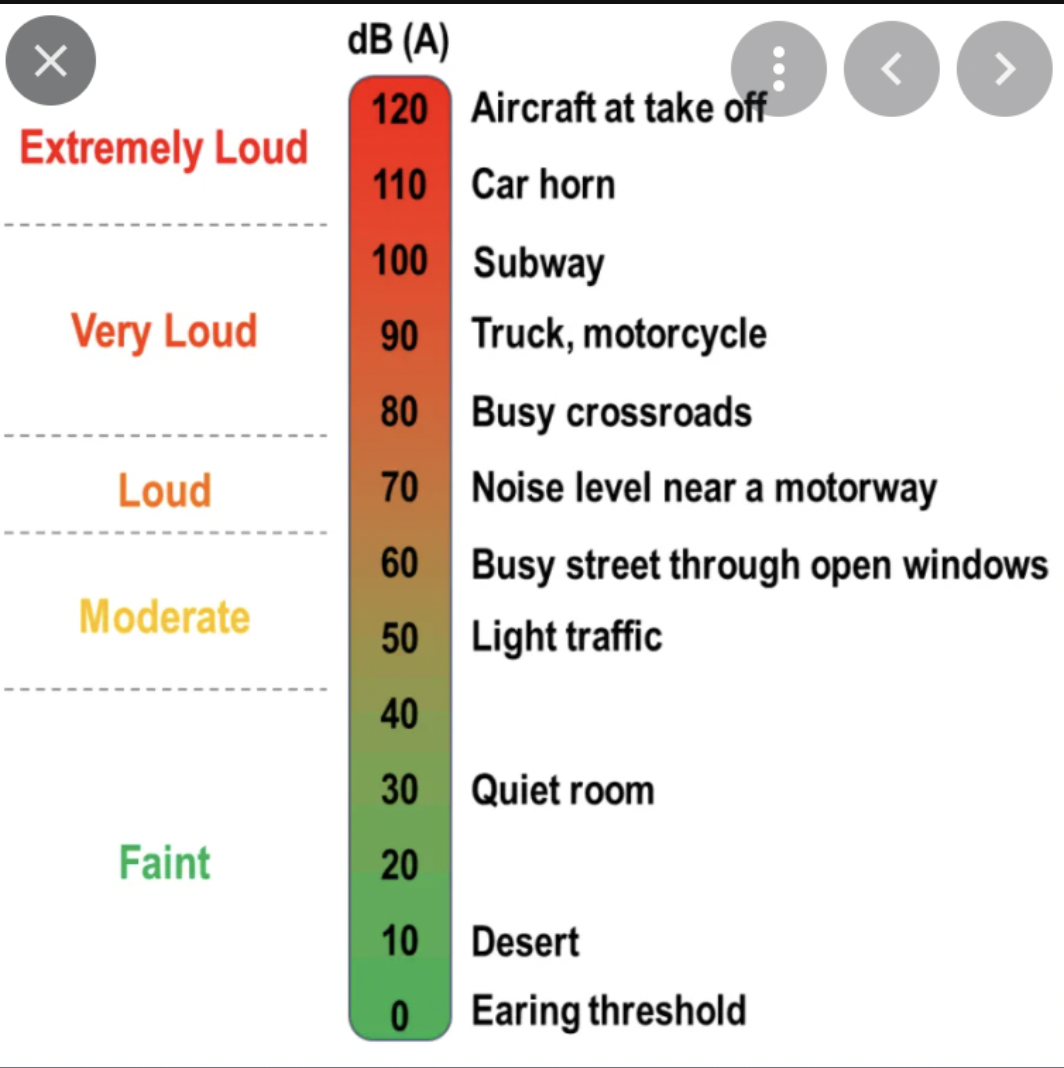

In [2]:
sound = wrangle.wrangle_sound()
sound.head(1)

,DateTime,NoiseLevel_db,noise_level
0,2021-05-20 00:01:27,61,Moderate


In [3]:
sound_train, sound_validate, sound_test = wrangle.split_data(sound)

In [5]:
sound['dates'] = pd.to_datetime(sound['DateTime']).dt.date
sound['time'] = pd.to_datetime(sound['DateTime']).dt.time
sound['hour'] = pd.to_datetime(sound['DateTime']).dt.hour
sound['weekday'] = pd.to_datetime(sound['DateTime']).dt.weekday

In [7]:
sound.head()

,DateTime,NoiseLevel_db,noise_level,dates,time,hour,weekday
0,2021-05-20 00:01:27,61,Moderate,2021-05-20,00:01:27,0,3
1,2021-05-20 00:04:28,61,Moderate,2021-05-20,00:04:28,0,3
2,2021-05-20 00:07:27,61,Moderate,2021-05-20,00:07:27,0,3
3,2021-05-20 00:10:27,61,Moderate,2021-05-20,00:10:27,0,3
4,2021-05-20 00:13:27,61,Moderate,2021-05-20,00:13:27,0,3


___
# Start exploring sound

Text(0.5, 1.0, 'Noise level by hour zoomed in further')

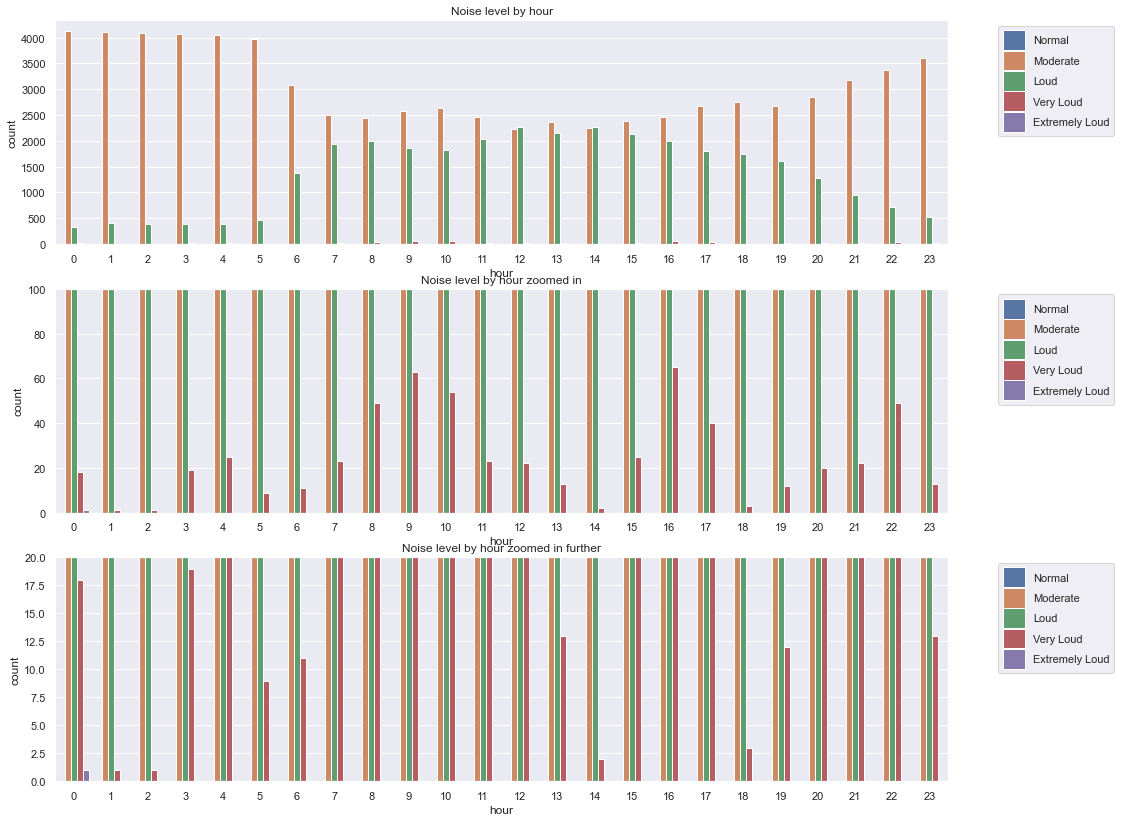

In [19]:
plt.subplots(3,1, figsize=(16,14), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.countplot(data=sound, x='hour', hue='noise_level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Noise level by hour')

plt.subplot(3,1,2)
plot = sns.countplot(data=sound, x='hour', hue='noise_level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 100))
plt.title('Noise level by hour zoomed in')

plt.subplot(3,1,3)
plot = sns.countplot(data=sound, x='hour', hue='noise_level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 20))
plt.title('Noise level by hour zoomed in further')

### Takeaways:
- Sound level is usually Moderate or Loud
- 4pm-5pm tend to have more recorded time at the ver loud level
- Hours beteen 8 and 11 am have a lot of ver loud recorded moments.
- Midnight to 6am is the quietest time in the medical center
___

Text(0.5, 1.0, 'Noise level by hour zoomed in further')

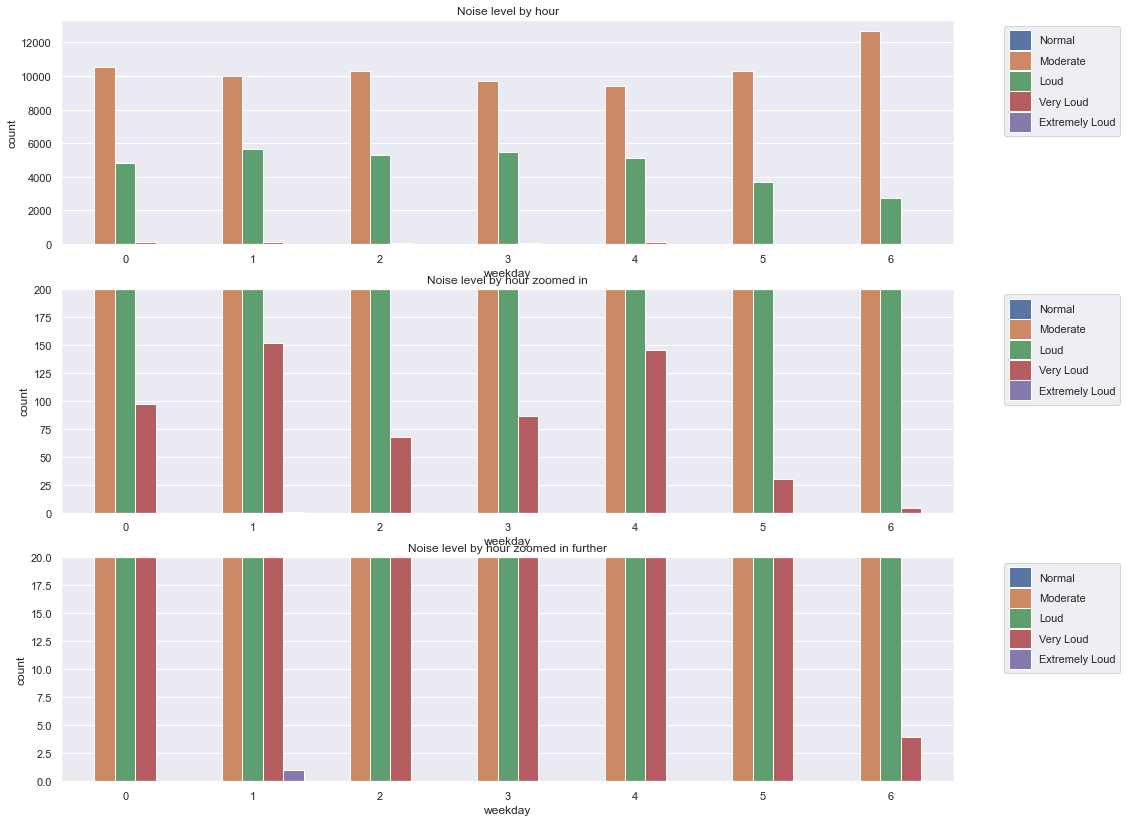

In [23]:
plt.subplots(3,1, figsize=(16,14), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.countplot(data=sound, x='weekday', hue='noise_level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Noise level by hour')

plt.subplot(3,1,2)
plot = sns.countplot(data=sound, x='weekday', hue='noise_level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 200))
plt.title('Noise level by hour zoomed in')

plt.subplot(3,1,3)
plot = sns.countplot(data=sound, x='weekday', hue='noise_level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 20))
plt.title('Noise level by hour zoomed in further')

### Takeaways:
- Tuesdays and Fridays have a lot of recorded moments that were very loud
- Sundays have the highest number of moderate sound level recorded and the least amount of loud recordings
___